In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

In [61]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized


# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))


# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [62]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)

# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# число нейронов скрытого слоя
neuron_hidden = 500

# присваивание случайных весов
np.random.seed(1)

# для входного слоя - 64 входа, neuron_numb выходов
w0 = np.random.random((64, neuron_hidden))
# для внутреннего слоя - neuron_numb входов, 10 выходов
w1 = np.random.random((neuron_hidden, 10))

learning_rate = 0.001

num_epochs = 1000

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

In [63]:
# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(layer0 @ w0)
    layer2 = sigmoid(layer1 @ w1)

    # обратное распространение (back propagation)
    # с использованием градиентного спуска
    layer2_error = layer2 - y_train # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_grad @ w1.T
    layer1_grad = layer1_error * sigmoid_deriv(layer1)

    w1 -= layer1.T @ layer2_grad * learning_rate
    w0 -= layer0.T @ layer1_grad * learning_rate

    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)

    # метрики качества
    preds = np.argmax(layer2, axis = 1)
    labels = np.argmax(y_train, axis = 1)
    accuracy = (preds == labels).sum() * 100/len(labels)
    metrics.append(accuracy)

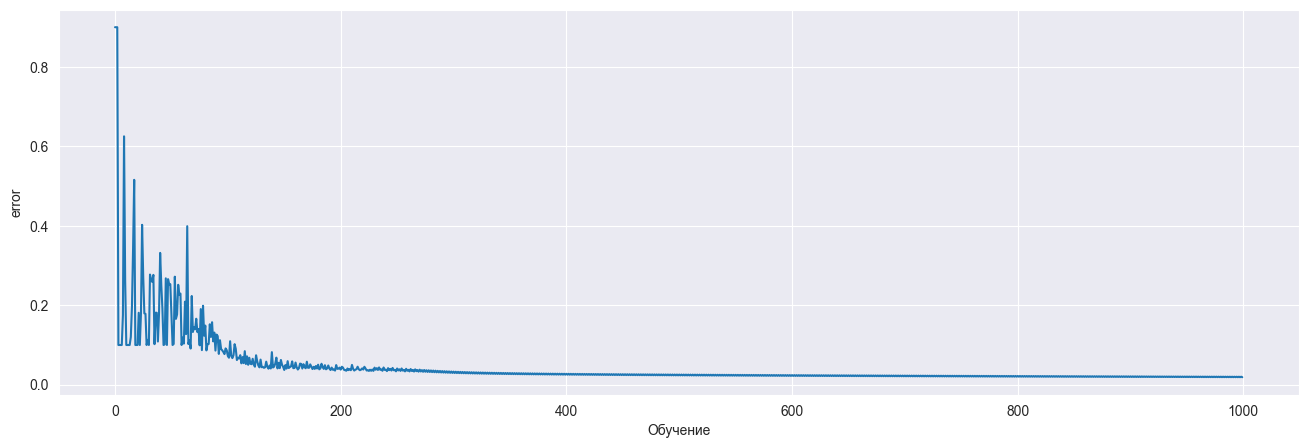

In [64]:
plt.figure(figsize=(16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('error')
plt.show()

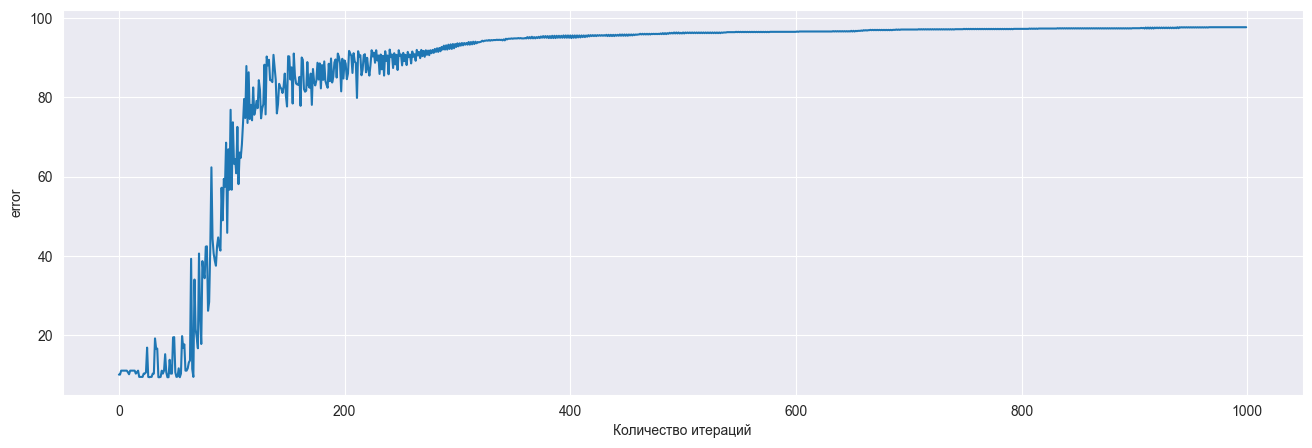

In [65]:
plt.figure(figsize=(16,5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('error')
plt.show('Accuracy')

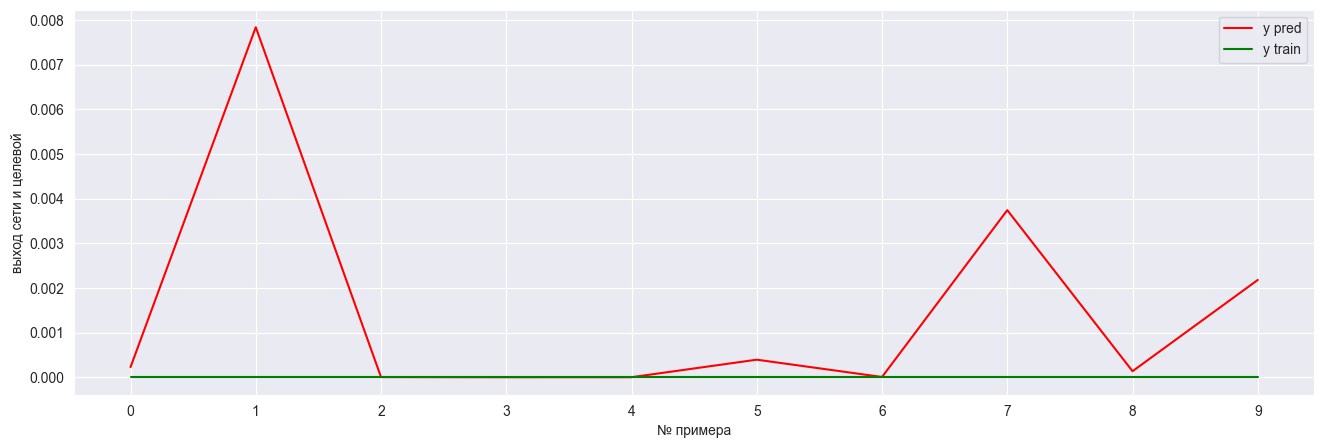

accuracy на обучении 97.76%


In [66]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

print(f"accuracy на обучении {accuracy:.2f}%")

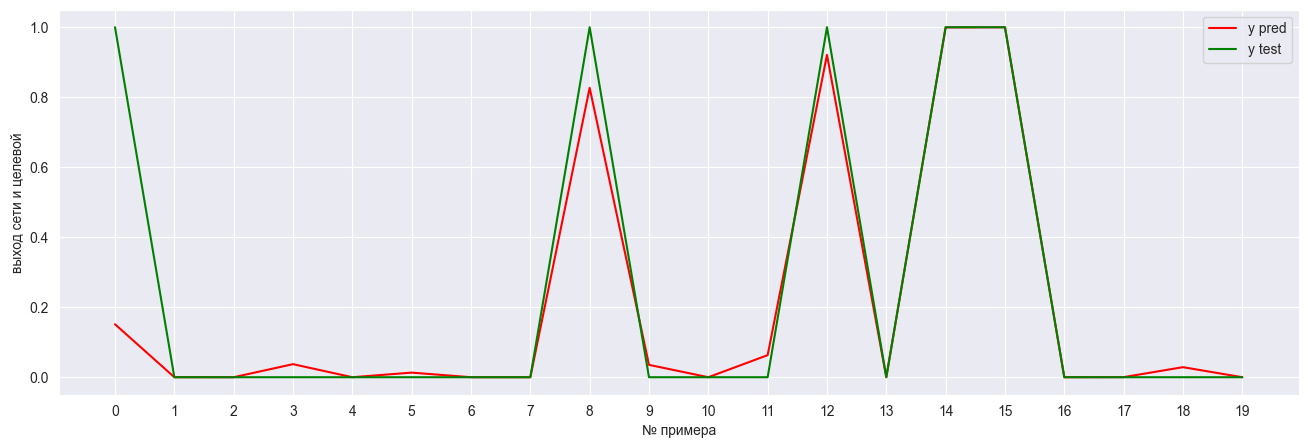

accuracy на тесте 95.79%


In [67]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))


N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")